**New York City Taxi Fare Prediction** **by Anuj Atri**

The duty is to predict the fare amount for a taxi ride in New York City given the pickup and dropoff. While we can get a basic estimate based on just the distance between the two points, this will result in an RMSE of $5-$8, depending on the model used. The main Challenge is to do better than this using Machine Learning techniques.

**File descriptions**

train.csv - Input features and target fare_amount values for the training set (about 55M rows).

test.csv - Input features for the test set (about 10K rows). Your goal is to predict fare_amount for each row.

sample_submission.csv - a sample submission file in the correct format (columns key and fare_amount). This file 'predicts' fare_amount to be $11.35 for all rows, which is the mean fare_amount from the training set.

**Target**

<ul>
<li><strong>amount</strong> - <code>float</code> dollar amount of the cost of the taxi ride.  This value is only in the training set; this is what you are predicting in the test set and it is required in your submission CSV.</li>
</ul>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:

count = 0

sc1tr= sc2tr= sc3tr= sc4tr= sc5tr= sc6tr= sc7tr= sc8tr= sc9tr= sc10tr= sc11tr= sc12tr= sc13tr = 0
sc1ts= sc2ts= sc3ts= sc4ts= sc5ts= sc6ts= sc7ts= sc8ts = sc9ts= sc10ts= sc11ts= sc12ts= sc13ts = 0

**Numerical Analysis**

In [ ]:
df.shape

(50000, 8)

In [ ]:
df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
unique_id,50000,3597,26:00.0,457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,50000.0,NaN,NaN,NaN,11.364171,9.685557,-5.0,6.0,8.5,12.5,200.0
date_time_of_pickup,50000,49555,2011-09-03 01:30:00 UTC,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude_of_pickup,50000.0,NaN,NaN,NaN,-72.509756,10.39386,-75.423848,-73.992062,-73.98184,-73.967148,40.783472
latitude_of_pickup,50000.0,NaN,NaN,NaN,39.933759,6.224857,-74.006893,40.73488,40.752678,40.76736,401.083332
longitude_of_dropoff,50000.0,NaN,NaN,NaN,-72.504616,10.40757,-84.654241,-73.991152,-73.980082,-73.963584,40.851027
latitude_of_dropoff,50000.0,NaN,NaN,NaN,39.926251,6.014737,-74.006377,40.734372,40.753372,40.768167,43.41519
no_of_passenger,50000.0,NaN,NaN,NaN,1.66784,1.289195,0.0,1.0,1.0,2.0,6.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [ ]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

**Data Visualiztion**

<AxesSubplot:xlabel='no_of_passenger', ylabel='Count'>

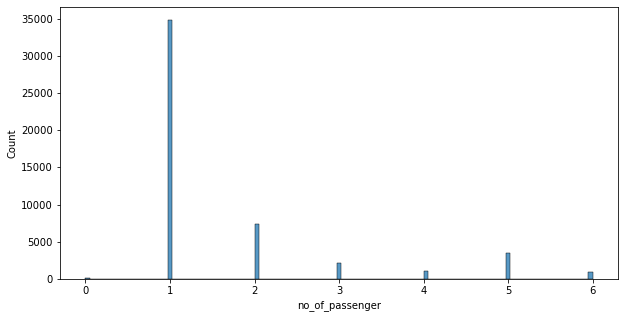

In [ ]:
plt.figure(figsize = (10,5))

sns.histplot(x='no_of_passenger', data=df)

<AxesSubplot:xlabel='no_of_passenger'>

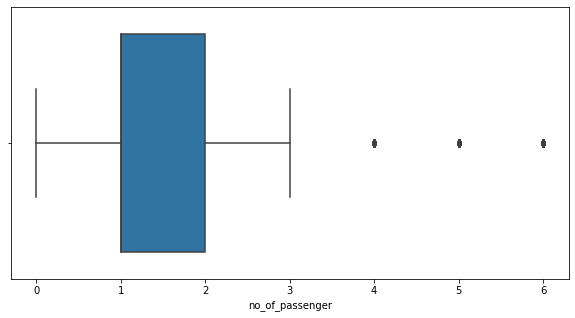

In [ ]:
plt.figure(figsize = (10,5))

sns.boxplot( x="no_of_passenger", data=df)

<AxesSubplot:xlabel='longitude_of_pickup'>

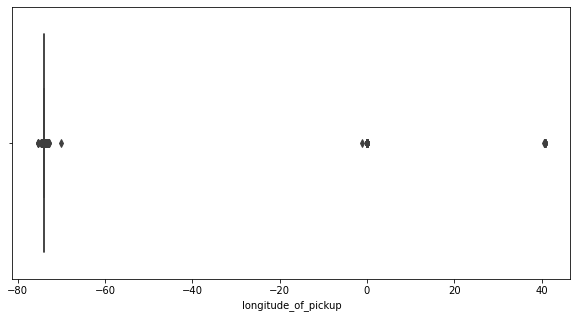

In [ ]:
plt.figure(figsize = (10,5))

sns.boxplot( x="longitude_of_pickup", data=df)

<AxesSubplot:xlabel='latitude_of_pickup'>

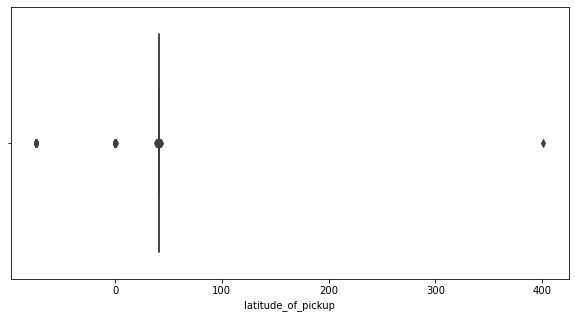

In [ ]:
plt.figure(figsize = (10,5))

sns.boxplot( x="latitude_of_pickup", data=df)

<AxesSubplot:xlabel='longitude_of_dropoff'>

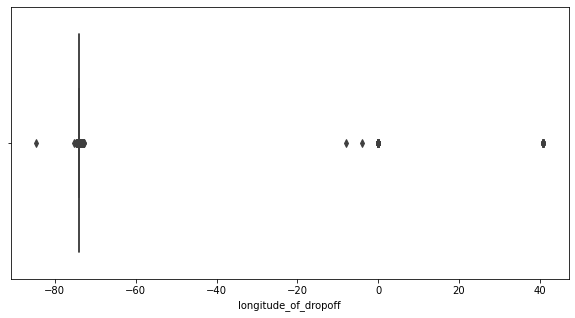

In [ ]:
plt.figure(figsize = (10,5))

sns.boxplot( x="longitude_of_dropoff", data=df)

<AxesSubplot:xlabel='latitude_of_dropoff'>

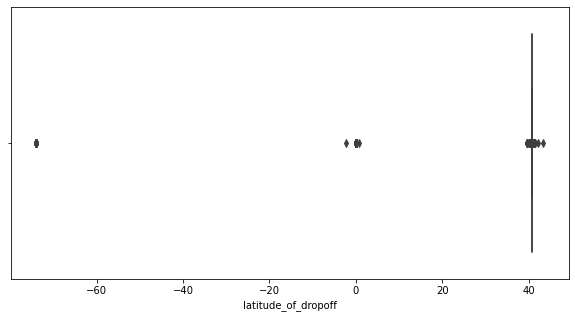

In [ ]:
plt.figure(figsize = (10,5))

sns.boxplot( x="latitude_of_dropoff", data=df)

<AxesSubplot:>

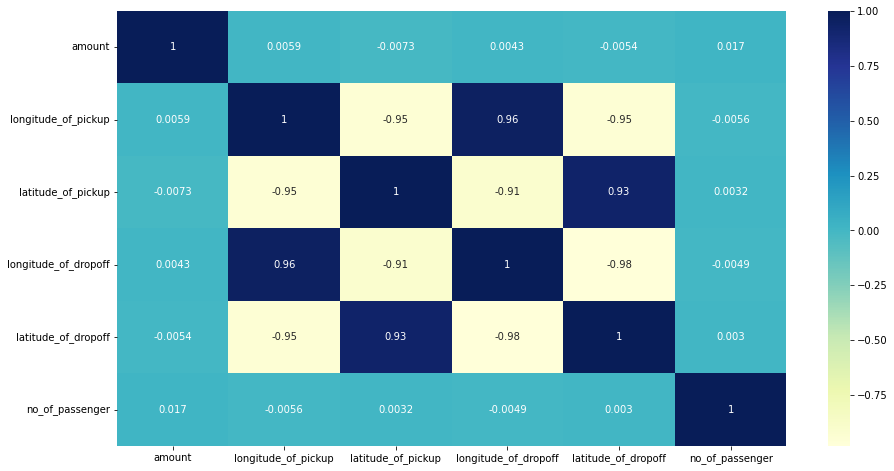

In [ ]:
plt.figure(figsize = (15, 8))
corr = df.corr()
sns.heatmap(corr, annot=True,cmap="YlGnBu")

** Missing Values**

In [ ]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

**Duplicate Values**

In [ ]:
df.duplicated().sum()

0

In [ ]:
lst = list(df.index)
lst.count(16396)
df.shape

(50000, 8)

In [ ]:
# df.reset_index(inplace = True, drop = True) -> use this line after dropping columns to reset index.
# Code gives error otherwise.

zero_coord = np.where(df['longitude_of_pickup'] == 0.000000)
df.drop(zero_coord[0], inplace= True)
df.reset_index(inplace = True, drop = True)

In [ ]:
df.shape

(49045, 8)

In [ ]:
zero_coord = np.where(df['latitude_of_pickup'] == 0.000000)
df.drop(zero_coord[0], inplace= True)
df.reset_index(inplace = True, drop = True)

In [ ]:
df.shape

(49043, 8)

In [ ]:
zero_coord = np.where(df['longitude_of_dropoff'] == 0.000000)
df.drop(zero_coord[0], inplace= True)
df.reset_index(inplace = True, drop = True)

In [ ]:
df.shape

(49000, 8)

In [ ]:
zero_coord = np.where(df['latitude_of_dropoff'] == 0.000000)
df.drop(zero_coord[0], inplace= True)
df.reset_index(inplace = True, drop = True)

In [ ]:
df.shape

(49000, 8)

**Approximating latitudes and longitudes**

In [2]:
import copy

def approx_coordinates(df, column):
    df = copy.copy(df)
    df = df.sort_values([column])
    loop_counter = len(df[column]) - 1
    changed = 0
    
    for i in range(loop_counter):
        diff = df[column].loc[i+1] - df[column].loc[i]
        if(abs(diff) <= 0.000999):
            df[column].loc[i+1] = df[column].loc[i]
            changed = changed + 1
    print("Total Changed:", changed)
    
    return df[column]

In [ ]:
df['longitude_of_pickup']= approx_coordinates(df, 'longitude_of_pickup')

In [ ]:
#df['longitude_of_pickup'].value_counts().sort_values(ascending=False)

In [ ]:
df['latitude_of_pickup']= approx_coordinates(df, 'latitude_of_pickup')

Total Changed: 1268


In [ ]:
#df['latitude_of_pickup'].value_counts().sort_values(ascending=False)

In [ ]:
df['longitude_of_dropoff']= approx_coordinates(df, 'longitude_of_dropoff')

Total Changed: 1501


In [ ]:
#df['longitude_of_dropoff'].value_counts().sort_values(ascending=False)

In [ ]:
df['latitude_of_dropoff']= approx_coordinates(df, 'latitude_of_dropoff')

Total Changed: 1140


In [ ]:
#df['latitude_of_dropoff'].value_counts().sort_values(ascending=False)

**Removing the outliers**

In [ ]:
import copy

def remove_outliers(df, column):
    # IQR
    Q1 = np.percentile(df[column], 25,
                    interpolation = 'midpoint')

    Q3 = np.percentile(df[column], 75,
                    interpolation = 'midpoint')
    IQR = Q3 - Q1

    print("Old Shape: ", df.shape)
    
    # Upper bound
    upper = np.where(df[column] >= (Q3+1.5*IQR))
    df.drop(upper[0], inplace= True)
    df.reset_index(inplace = True, drop = True)

     # Lower bound
    lower = np.where(df[column] <= (Q1-1.5*IQR))
    df.drop(lower[0], inplace= True)
    df.reset_index(inplace = True, drop = True)

    print("New Shape: ", df.shape)
    sns.boxplot(x=column, data=df)
    
    
    return df

In [ ]:
#df = remove_outliers(df, 'longitude_of_pickup')

In [ ]:
#df = remove_outliers(df, 'latitude_of_pickup')

In [ ]:
#df = remove_outliers(df, 'longitude_of_dropoff')

In [ ]:
#df = remove_outliers(df, 'latitude_of_dropoff')

In [ ]:
#df = remove_outliers(df, 'amount')

In [ ]:
df.drop(np.where(df['no_of_passenger'] == 4)[0], inplace= True)
df.reset_index(inplace = True, drop = True)

In [ ]:
df.drop(np.where(df['no_of_passenger'] == 6)[0], inplace= True)
df.reset_index(inplace = True, drop = True)

In [ ]:
df.shape

(47029, 8)

Invalid Data

In [ ]:
# There are some negative amount values

negative_amounts = np.where(df['amount'] <= 0)
df.drop(negative_amounts[0], inplace= True)
df.reset_index(inplace = True, drop = True)

In [ ]:
df.shape

(47022, 8)

In [ ]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

date_time_of_pickup column is of object type

In [ ]:
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'])

In [ ]:
df.dtypes

unique_id                            object
amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

In [ ]:
import datetime as dt

year = df['date_time_of_pickup'].dt.year

In [ ]:
year.value_counts().sort_index()

2009    7429
2010    7290
2011    7402
2012    7462
2013    7253
2014    6985
2015    3201
Name: date_time_of_pickup, dtype: int64

Data entry for year starting from 2009 to 2015

In [ ]:
month = df['date_time_of_pickup'].dt.month

In [ ]:
month.value_counts().sort_index()

1     4289
2     4074
3     4352
4     4269
5     4331
6     4236
7     3432
8     3340
9     3588
10    3821
11    3521
12    3769
Name: date_time_of_pickup, dtype: int64

In [ ]:
df['month'] = month
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,month
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,6
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,8
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991242,40.758092,1,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,3


In [ ]:
day = df['date_time_of_pickup'].dt.day

In [ ]:
day.value_counts().sort_index()

1     1426
2     1525
3     1484
4     1407
5     1486
6     1585
7     1615
8     1631
9     1572
10    1608
11    1519
12    1640
13    1640
14    1593
15    1616
16    1686
17    1557
18    1579
19    1623
20    1524
21    1620
22    1573
23    1577
24    1500
25    1507
26    1450
27    1439
28    1545
29    1306
30    1358
31     831
Name: date_time_of_pickup, dtype: int64

In [ ]:
df['day'] = day
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,month,day
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,6,15
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,1,5
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,8,18
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991242,40.758092,1,4,21
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,3,9


In [ ]:
dayofweek = df['date_time_of_pickup'].dt.dayofweek

In [ ]:
dayofweek.value_counts().sort_index()

0    6261
1    6524
2    6798
3    7034
4    7206
5    7129
6    6070
Name: date_time_of_pickup, dtype: int64

In [ ]:
df['dayofweek'] = dayofweek
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,month,day,dayofweek
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,6,15,0
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,1,5,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,8,18,3
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991242,40.758092,1,4,21,5
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,3,9,1


In [ ]:
hour = df['date_time_of_pickup'].dt.hour

In [ ]:
hour.value_counts().sort_index()

0     1763
1     1391
2     1027
3      783
4      571
5      476
6      968
7     1789
8     2098
9     2265
10    2146
11    2243
12    2326
13    2342
14    2309
15    2217
16    1923
17    2317
18    2909
19    2927
20    2664
21    2639
22    2615
23    2314
Name: date_time_of_pickup, dtype: int64

In [ ]:
df['hour'] = hour
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,month,day,dayofweek,hour
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,6,15,0,17
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,1,5,1,16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,8,18,3,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991242,40.758092,1,4,21,5,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,3,9,1,7


In [ ]:
df.drop(['unique_id', 'date_time_of_pickup'], inplace= True, axis= 1)
df.reset_index(inplace = True, drop = True)


In [ ]:
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,month,day,dayofweek,hour
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,6,15,0,17
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,1,5,1,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,8,18,3,0
3,7.7,-73.987130,40.733143,-73.991242,40.758092,1,4,21,5,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,3,9,1,7


**Extracting features and labels**

In [ ]:
X = df.drop('amount', axis= 1)
y = df['amount']

In [ ]:
X.dtypes

longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
month                     int64
day                       int64
dayofweek                 int64
hour                      int64
dtype: object

**Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler 

st_x = StandardScaler()  
X_transformed = st_x.fit_transform(X) 

In [ ]:
X_transformed = pd.DataFrame(X_transformed, columns = ['longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger','month','day',
        'dayofweek', 'hour'])

In [ ]:
X_transformed.head()

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,month,day,dayofweek,hour
0,0.040850,0.001615,0.037195,0.001531,-0.481819,-0.078102,-0.076078,-1.546529,0.542651
1,-0.038272,-0.002081,-0.023512,0.033964,-0.481819,-1.522486,-1.232226,-1.034810,0.388715
2,-0.022925,0.016357,-0.028792,0.019339,0.427079,0.499652,0.270766,-0.011372,-2.074255
3,-0.024949,0.005978,-0.028792,0.022841,-0.481819,-0.655855,0.617610,1.012066,-1.458513
4,-0.016179,0.018843,-0.013539,0.034781,-0.481819,-0.944732,-0.769767,-1.034810,-0.996706


In [ ]:
df.columns

Index(['amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger',
       'month', 'day', 'dayofweek', 'hour'],
      dtype='object')

In [ ]:
y_arr = np.array(y).reshape(-1,1)
y_arr.shape
y = st_x.fit_transform(y_arr) 

In [ ]:
y_transformed = pd.DataFrame(y, columns= ['amount'])
y_transformed.head()

,amount
0,-0.709810
1,0.577544
2,-0.585227
3,-0.377590
4,-0.626755


**Training and testing data**

In [ ]:
# Value of random state

rdst = 42

In [ ]:
# Normal Data

#xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.3, random_state= rdst)

In [ ]:
# Scaled Data

xtrain, xtest, ytrain, ytest = train_test_split(X_transformed, y_transformed, test_size= 0.2, random_state= rdst)

**Testing of model**

#### 1) Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model1 = DecisionTreeRegressor(max_depth=6 , max_features='sqrt', random_state= rdst)
model1.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=6, max_features='sqrt', random_state=42)

In [ ]:
sc1tr = model1.score(xtrain, ytrain)
sc1tr 

0.6027600079840413

In [ ]:
sc1ts = model1.score(xtest, ytest)
sc1ts

0.5785505872336492

In [ ]:
#adding values for performance report
count = count + 1

#### 2) SVM

In [ ]:
from sklearn.svm import SVR

model2 = SVR()
model2.fit(xtrain, ytrain)

In [ ]:
sc2tr = model2.score(xtrain, ytrain)
sc2tr

In [ ]:
sc2ts =model2.score(xtest, ytest)
sc2ts

In [ ]:
count = count + 1

#### 3) SGD

In [ ]:
from sklearn.linear_model import SGDRegressor

model3 = SGDRegressor(random_state= rdst)
model3.fit(xtrain, ytrain)

C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(random_state=42)

In [ ]:
sc3tr = model3.score(xtrain, ytrain)
sc3tr

-4.388767703702596e+21

In [ ]:
sc3ts = model3.score(xtest, ytest)
sc3ts

-3.8864903064549715e+21

In [ ]:
#adding values for performance report
count = count + 1

#### 4) Bagging Regressor

In [ ]:
from sklearn.ensemble import BaggingRegressor

model4 = BaggingRegressor(base_estimator= model1,random_state= rdst)
model4.fit(xtrain, ytrain)

C:\Users\prana\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:510: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
C:\Users\prana\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=6,
                                                      max_features='sqrt',
                                                      random_state=42),
                 random_state=42)

In [ ]:
sc4tr = model4.score(xtrain, ytrain)
sc4tr

0.652308846406233

In [ ]:
sc4ts = model4.score(xtest, ytest)
sc4ts

0.6336399295358104

In [ ]:
#adding values for performance report
count = count + 1

#### 5) AdaBoostRegressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

model5 = AdaBoostRegressor(random_state= rdst)
model5.fit(xtrain, ytrain)

C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(random_state=42)

In [ ]:
sc5tr = model5.score(xtrain, ytrain)
sc5tr

-2.2272072831151832

In [ ]:
sc5ts = model5.score(xtest, ytest)
sc5ts

-2.3303117860593052

In [ ]:
#adding values for performance report
count = count + 1

#### 6) GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model6 = GradientBoostingRegressor(random_state= rdst)
model6.fit(xtrain, ytrain)

C:\Users\prana\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=42)

In [ ]:
sc6tr = model6.score(xtrain, ytrain)
sc6tr

0.7726810383487652

In [ ]:
sc6ts = model6.score(xtest, ytest)
sc6ts

0.7290197996595463

In [ ]:
#adding values for performance report
count = count + 1

#### 7) RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model7 = RandomForestRegressor(n_jobs= 2, random_state= rdst, min_samples_split= 8, min_samples_leaf= 1)
model7.fit(xtrain, ytrain)

C:\Users\prana\AppData\Local\Temp/ipykernel_20256/3103751781.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model7.fit(xtrain, ytrain)


RandomForestRegressor(min_samples_split=8, n_jobs=2, random_state=42)

In [ ]:
sc7tr = model7.score(xtrain, ytrain)
sc7tr

0.9337961111419366

In [ ]:
sc7ts = model7.score(xtest, ytest)
sc7ts

0.7834731216316448

In [ ]:
#adding values for performance report
count = count + 1

In [ ]:
y_preds = model7

#### 8) Simple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model8 = LinearRegression()
model8.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
sc8tr = model8.score(xtrain, ytrain)
sc8tr

0.0025470733714684224

In [ ]:
sc8ts = model8.score(xtest, ytest)
sc8ts

0.0025690736825197957

In [ ]:
#adding values for performance report
count = count + 1

#### 9) GausianRegressor

In [ ]:
#adding values for performance report
count = count + 1

#### 10) K nearest neighbour

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model10 = KNeighborsRegressor()
model10.fit(xtrain, ytrain)

KNeighborsRegressor()

In [ ]:
sc10tr = model10.score(xtrain, ytrain)
sc10tr

0.24069399401100422

In [ ]:
sc10ts = model10.score(xtest, ytest)
sc10ts

-0.12588821980629095

In [ ]:
#adding values for performance report
count = count + 1

#### 11) LGBMBoost

In [ ]:
from lightgbm import LGBMRegressor

model11 = LGBMRegressor(random_state= rdst)
model11.fit(xtrain, ytrain)

LGBMRegressor(random_state=42)

In [ ]:
sc11tr = model11.score(xtrain, ytrain)
sc11tr

0.8125874953699608

In [ ]:
sc11ts = model11.score(xtest, ytest)
sc11ts 

0.7739054555605506

In [ ]:
#adding values for performance report
count = count + 1

#### 12) CatBoostRegressor

In [ ]:
#adding values for performance report
count = count + 1

#### 13) XGBoostRegressor

In [ ]:
from xgboost.sklearn import XGBRegressor

model13 = XGBRegressor(random_state= rdst)
model13.fit(xtrain, ytrain)

In [ ]:
sc13tr = model13.score(xtrain, ytrain)
sc13tr

0.9087513469662362

In [ ]:
sc13ts = model13.score(xtest, ytest)
sc13ts 

0.7691877829932929

In [ ]:
#adding values for performance report
count = count + 1

### Performance of Algorithms

In [ ]:
mnumber = list()
mname = list()
trains = list()
tests = list()

In [ ]:
mnumber.extend(np.arange(1,count+1))

mname.extend(["DecisionTreeRegressor","SVM","SGDRegressor","BaggingRegressor","AdaBoostRegressor","GradientBoostingRegressor",
                 "RandomForestRegressor","SimpleLinearRegression","GausianRegressor","K nearest neighbour","LGBMBoost",
                 "CatBoostRegressor","XGBRegressor"])

trains.extend([sc1tr,sc2tr,sc3tr,sc4tr,sc5tr,sc6tr,sc7tr,sc8tr,sc9tr,sc10tr,sc11tr,sc12tr,sc13tr])

tests.extend([sc1ts,sc2ts,sc3ts,sc4ts,sc5ts,sc6ts,sc7ts,sc8ts,sc9ts,sc10ts,sc11ts,sc12ts,sc13ts])

In [ ]:
# Rounding percentages to two decimals and checking if model was executed

def myfunc(x):
    x = x * 100
    return format(x,".2f")

def executed(x):
    if x == '0.00':
        x = 'Not Executed'
    return x

In [ ]:
trains = list(map(myfunc, trains))

In [ ]:
trains = list(map(executed, trains))

In [ ]:
tests = list(map(myfunc, tests))

In [ ]:
tests = list(map(executed, tests))

In [ ]:
results_dict = {"Model No.": mnumber, "Model name": mname,
               "Training Accuracy": trains, "Testing Accuracy": tests}

In [ ]:
perf = pd.DataFrame(results_dict)
perf

,Model No.,Model name,Training Accuracy,Testing Accuracy
0,1,DecisionTreeRegressor,60.28,57.86
1,2,SVM,Not Executed,Not Executed
2,3,SGDRegressor,-438876770370259651657728.00,-388649030645497173377024.00
3,4,BaggingRegressor,65.23,63.36
4,5,AdaBoostRegressor,-222.72,-233.03
5,6,GradientBoostingRegressor,77.27,72.90
6,7,RandomForestRegressor,93.38,78.35
7,8,SimpleLinearRegression,0.25,0.26
8,9,GausianRegressor,Not Executed,Not Executed
9,10,K nearest neighbour,24.07,-12.59
